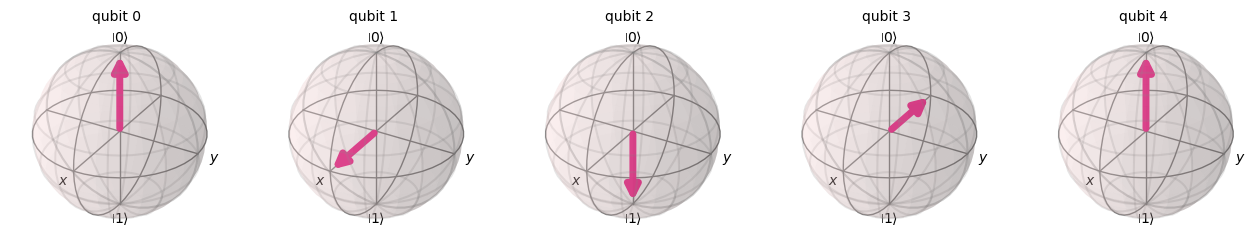

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import math

qc = QuantumCircuit(5)
qc.ry(math.pi/2, 1)
qc.ry(math.pi, 2)
qc.ry(3*math.pi/2, 3)
qc.ry(2*math.pi, 4)
plot_bloch_multivector(qc)

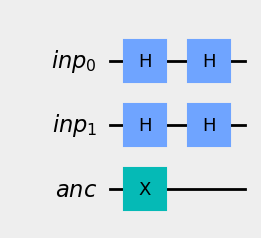

In [3]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)
#qc.h(inp_reg)  
#qc.x(ancilla)
qc.h(inp_reg) 
qc.h(inp_reg) 
qc.x(ancilla)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

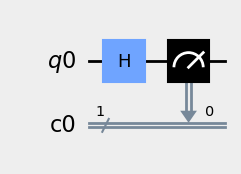

In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [79]:
import numpy as np
my_array = np.array(['English', 'Mathematics', 'Biology', 'Psychology', 'History',
       'Chemistry', 'Communications', 'Business'], dtype=object)
# Get the second value (at index position 1)
print(my_array[0])
print(my_array[1])
print(my_array[0:4])
print(my_array[5:7])
print(my_array[-1])
arange = np.arange(1, 6, 2) 
print(arange)

English
Mathematics
['English' 'Mathematics' 'Biology' 'Psychology']
['Chemistry' 'Communications']
Business
[1 3 5]


In [86]:
# This code we have not covered yet.  We will cover it soon.
# It loads the data file, and makes some arrays.

# Load the library for reading data files.
import pandas as pd
# Safe settings for Pandas. We'll come on to this later.
pd.set_option('mode.chained_assignment', 'raise')
# Read the file.
courses = pd.read_csv('rate_my_course.csv')
# Sort the courses by number of rated teachers, most first.
courses_by_n = courses.sort_values(
    'Number of Professors', ascending=False)
# Select the top eight easiest courses.
big_courses = courses_by_n.head(8)
disciplines = np.array(big_courses['Discipline'])
easiness = np.array(big_courses['Easiness'])
quality = np.array(big_courses['Overall Quality'])
disciplines

array(['English', 'Mathematics', 'Biology', 'Psychology', 'History',
       'Chemistry', 'Communications', 'Business'], dtype=object)

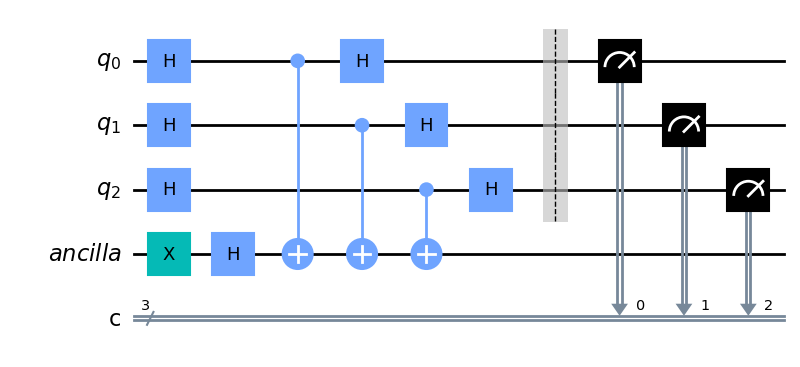

In [87]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw('mpl')

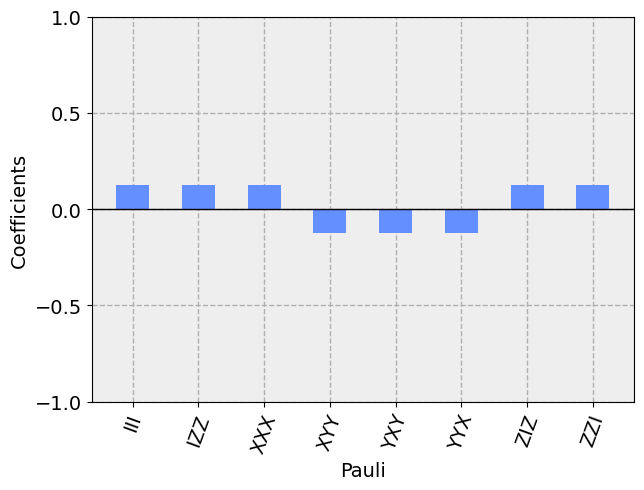

In [154]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
# Create a circuit with a register of three qubits
circ = QuantumCircuit(3)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.
circ.cx(0, 2)
# Draw the circuit
#circ.draw('mpl')
state= Statevector(circ)
plot_state_paulivec(state)

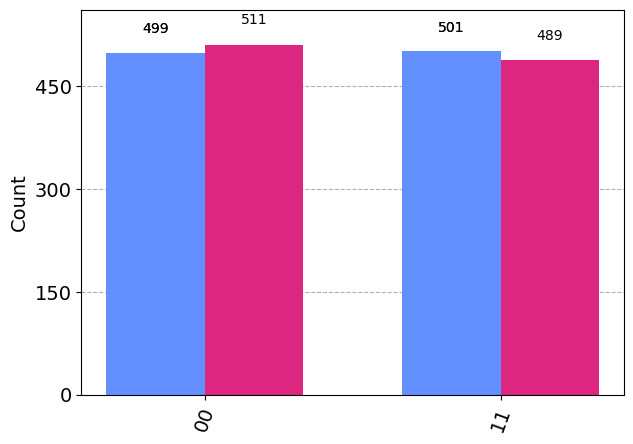

In [92]:
from qiskit.visualization import plot_histogram

counts1 = {'00': 499, '11': 501}
counts2 = {'00': 511, '11': 489}

data = [counts1, counts2]
plot_histogram(data)

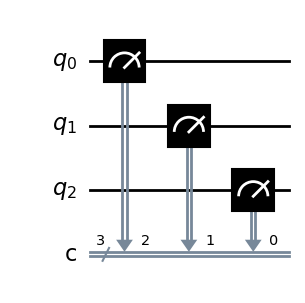

In [123]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3,3)
# qc.measure(0,0) - ok funciona
qc.measure([0,1,2], [2,1,0]) #precisa ser o mesmo número de um lado e de outro
#qc.measure_all() - funciona mesmo que o construtor for qc = QuantumCircuit(3)
qc.draw(output='mpl',style={'backgroundcolor': '#FFFFFF'})

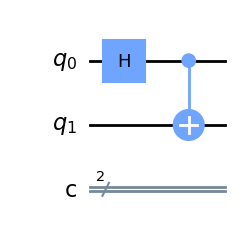

In [13]:
#QUESTAO 5 DO EXAME
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute
from qiskit import Aer
bell = QuantumCircuit(2,2) 
#Resposta A
#bell.h(0)
#bell.x(1)
#bell.cx(0, 1)

#Resposta B
#bell.cx(0, 1)
#bell.h(0)
#bell.x(1)

#Resposta C
#bell.h(0)
#bell.x(1)
#bell.cz(0, 1)

#Resposta D
#bell.h(0)
#bell.h(0)

#Resposta CORRETA QUE NAO EXISTE
#bell.h(0)
#bell.h(1)
#bell.cx(0, 1)

# O hadamard é convertido para 1 ou 0 quando controla outro QUBIT
bell.h(0)
bell.cx(0,1)

bell.draw(output='mpl',style={'backgroundcolor': '#FFFFFF'})
#bell.measure(0, 0)
#bell.measure(1, 1)
#job = execute(bell, backend = Aer.get_backend('qasm_simulator'), shots=256)
#result = job.result()
#count = result.get_counts()
#plot_histogram(count) 

In [36]:
#RESPOSTA 6 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import execute
from qiskit import Aer
qc = QuantumCircuit(1,1)

# RESPOSTA A
#qc.x(0)
#qc.h(0)

#RESPOSTA B
qc.rx(math.pi / 2, 0)
qc.s(0)
#RESPOSTA C
#qc.ry(math.pi / 2, 0)

#RESPOSTA D
#qc.rx(math.pi / 2, 0) 
#qc.rz(-math.pi / 2, 0)

#RESPOSTA E
#qc.ry(math.pi, 0)

#qc.s(0)


simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)
print(outputstate)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


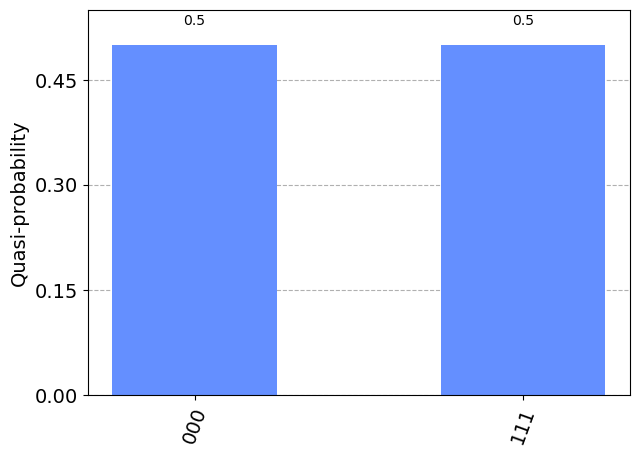

In [84]:
#RESPOSTA 6 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import execute
from qiskit import Aer
import math

qc = QuantumCircuit(3)

# RESPOSTA A
#qc.x(0)
#qc.x(1)
#qc.h(0)
#qc.h(1)
#qc.h(0)
#qc.h(1)

#v1, v2 = [1,0], [0,1] 
#qc.initialize(v1,0) 
#qc.initialize(v2,1)
qc.h(0)   
qc.cx(0,1)
qc.cx(0,2)

#qc.cx(0,1)
#v = [1/math.sqrt(2), 0, 0, 1/math.sqrt(2)] 
#qc.initialize(v,[0,1])

#qc.draw(output='mpl',style={'backgroundcolor': '#FFFFFF'})
#RESPOSTA B
#qc.rx(math.pi / 2, 0)
#qc.rx(-math.pi / 2, 1)

#RESPOSTA C
#qc.ry(math.pi / 2, 0)

#RESPOSTA D
#qc.rx(math.pi / 2, 0) 
#qc.rz(-math.pi / 2, 0)

#RESPOSTA E
#qc.ry(math.pi, 0)

#qc.s(0)


simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
#plot_bloch_multivector(outputstate)
count = result.get_counts()
plot_histogram(count) 
#print(outputstate)

In [2]:
import numpy as np
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
simulator = Aer.get_backend('statevector_simulator') 
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit) 
#plot_bloch_multivector(outputstate)
#print(outputstate)
count = result.get_counts()
plot_histogram(count) 
circuit.draw(output='mpl',style={'backgroundcolor': '#FFFFFF'})

NameError: name 'Aer' is not defined

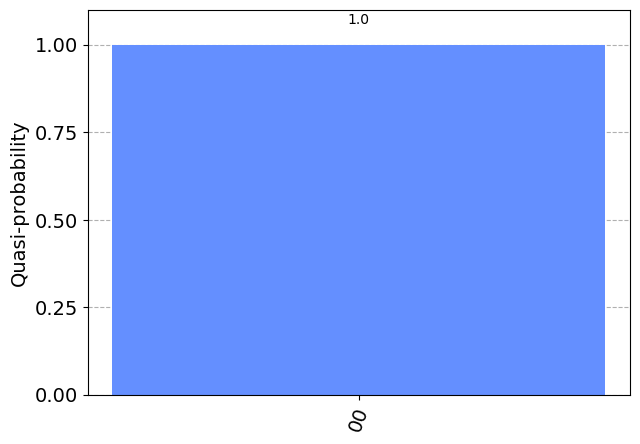

In [92]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
count = result.get_counts()
plot_histogram(count) 
#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})